In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as st

from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Load data

In [38]:
# lyrics data path
lyrics_path = "data/lyrics-data.csv"
lyrics_pd_df = pd.read_csv(lyrics_path)

# artists data path
artists_path = "data/artists-data.csv"
artists_pd_df = pd.read_csv(artists_path)

## Questions
- Which genre does a song belong to?
- Should we remove artists like "10 things I hate about you"?

## First Look

In [39]:
def df_overview(df: pd.DataFrame, number_of_lines: int = 10):
    """Use this function to generate an overview of a pandas dataframe.

    :param df: Dataframe to generate overview of
    :type df: pd.DataFrame
    :param number_of_lines: Number of df rows printed, defaults to 10
    :type number_of_lines: int, optional
    """
    
    print("Info about df:")
    print(df.info())
    
    print("\n")
    print("#" * 60)
    print("\n")
    
    nRow, nCol = df.shape
    print(f"There are {nRow} rows and {nCol} columns in df.")
    
    print("\n")
    print("#" * 60)
    print("\n")
    
    print(f"First {number_of_lines} of df:")
    print(df.head(number_of_lines))
    
    print("\n")
    print("#" * 60)
    print("\n")

In [40]:
# Unique languages
lyrics_pd_df.language.unique()

array(['pt', 'es', 'en', nan, 'it', 'gl', 'fr', 'de', 'tl', 'et', 'fi',
       'pl', 'da', 'st', 'sv', 'ro', 'af', 'no', 'eu', 'rw', 'sw', 'ga',
       'cy', 'ca', 'ny', 'ko', 'ar', 'gd', 'tr', 'id', 'su', 'lg', 'ru',
       'nl', 'sq', 'is', 'cs', 'jw', 'lv', 'hu', 'ms', 'ku', 'zh', 'hr',
       'ht', 'fa', 'mg', 'vi', 'ja', 'hmn', 'sr', 'iw', 'sl'],
      dtype=object)

In [41]:
# Filter for language en = english
lyrics_en_pd_df = lyrics_pd_df[lyrics_pd_df["language"] == "en"]

In [42]:
df_overview(lyrics_en_pd_df)

Info about df:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 191814 entries, 69 to 379930
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     191814 non-null  object
 1   SName     191812 non-null  object
 2   SLink     191814 non-null  object
 3   Lyric     191814 non-null  object
 4   language  191814 non-null  object
dtypes: object(5)
memory usage: 8.8+ MB
None


############################################################


There are 191814 rows and 5 columns in df.


############################################################


First 10 of df:
               ALink                                              SName  \
69   /ivete-sangalo/                                   Careless Whisper   
86   /ivete-sangalo/  Could You Be Loved / Citação Musical do Rap: S...   
88   /ivete-sangalo/                             Cruisin' (Part. Saulo)   
111  /ivete-sangalo/                                               

In [43]:
df_overview(artists_pd_df)

Info about df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      4167 non-null   object 
 1   Genres      4163 non-null   object 
 2   Songs       4167 non-null   float64
 3   Popularity  4166 non-null   float64
 4   Link        4167 non-null   object 
dtypes: float64(2), object(3)
memory usage: 162.9+ KB
None


############################################################


There are 4168 rows and 5 columns in df.


############################################################


First 10 of df:
                Artist                  Genres  Songs  Popularity  \
0        Ivete Sangalo     Pop; Axé; Romântico  313.0         4.4   
1  Chiclete com Banana                     Axé  268.0         3.8   
2            Banda Eva  Axé; Romântico; Reggae  215.0         2.3   
3            É O Tchan                     Axé  129.0         1.6   
4

In [44]:
# Merge artists and lyrics
songs_pd_df = pd.merge(
    lyrics_en_pd_df, 
    artists_pd_df, 
    how="inner",
    left_on="ALink",
    right_on="Link"
)

# Remove duplicate collumn
del songs_pd_df["Link"]

songs_pd_df.head()

,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity
0,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4
1,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4
2,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4
3,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4
4,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,en,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4


In [45]:
number_of_artists = songs_pd_df.Artist.nunique()
print(f"Number of unique artists: {number_of_artists}")

# use SLink, since song name could appear twice
# but is more unique with artist name
number_of_songs = songs_pd_df.SLink.nunique()
print(f"Number of unique songs: {number_of_songs}")

Number of unique artists: 2488
Number of unique songs: 191366


### Weird Artist names
Interestingly Artists can also be titles of movies

In [46]:
# Get mean values per artists
songs_pd_df.groupby("Artist").mean()

/var/folders/47/kf2nw7g97xj4bnnf6pdqwq640000gp/T/ipykernel_6215/300481635.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  songs_pd_df.groupby("Artist").mean()


,Songs,Popularity
Artist,,
*NSYNC,116.0,1.5
+44,15.0,0.0
10 Things I Hate About You,18.0,0.0
10000 Maniacs,110.0,0.0
10cc,141.0,0.0
...,...,...
f(x),81.0,0.0
one:day:life,12.0,0.0
t.A.T.u.,83.0,3.0


In [47]:
songs_pd_df[songs_pd_df["Artist"] == "10 Things I Hate About You"].head()

,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity
190270,/10-things-i-hate-about-you/,"I Love You, Baby",/10-things-i-hate-about-you/i-love-you-baby.html,"You're just too good to be true,\nCan't take m...",en,10 Things I Hate About You,Trilha Sonora; Rock Alternativo; Romântico,18.0,0.0
190271,/10-things-i-hate-about-you/,The Poem,/10-things-i-hate-about-you/the-poem.html,I hate the way you talk to me\nAnd the way you...,en,10 Things I Hate About You,Trilha Sonora; Rock Alternativo; Romântico,18.0,0.0
190272,/10-things-i-hate-about-you/,Atomic Dog,/10-things-i-hate-about-you/atomic-dog.html,"Yeah, this is a story of a famous dog\nFor the...",en,10 Things I Hate About You,Trilha Sonora; Rock Alternativo; Romântico,18.0,0.0
190273,/10-things-i-hate-about-you/,Calypso-spiderbait,/10-things-i-hate-about-you/calypso-spiderbait...,"Sunshine,\nOn the window,\nMakes me happy,\nLi...",en,10 Things I Hate About You,Trilha Sonora; Rock Alternativo; Romântico,18.0,0.0
190274,/10-things-i-hate-about-you/,Even Angels Fall,/10-things-i-hate-about-you/even-angels-fall.html,"You've found hope\nYou've found faith,\nFound ...",en,10 Things I Hate About You,Trilha Sonora; Rock Alternativo; Romântico,18.0,0.0


### Closer look at Artists

In [48]:
songs_pd_df.groupby("Artist").first().Songs.sort_values(ascending=False)

Artist
Frank Sinatra           828.0
Matheus Hardke          797.0
Elvis Presley           759.0
Dolly Parton            723.0
Hillsong United         695.0
                        ...  
Uma Banda Lá em Casa      1.0
Rocky Burnette            1.0
Rylo Rodriguez            1.0
Banda Morfina             1.0
The Sopranos              1.0
Name: Songs, Length: 2488, dtype: float64

Freedman–Diaconis number of bins: 58


Text(0.5, 1.0, 'Histogram')

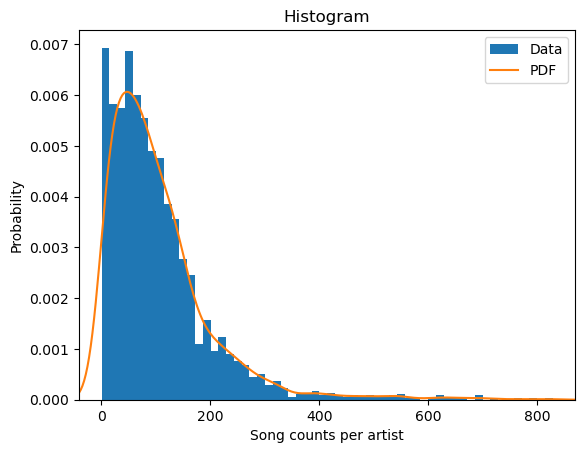

In [74]:
# Index of song count
y = songs_pd_df.groupby("Artist").first().Songs.index.values
# Song count per artist
x = songs_pd_df.groupby("Artist").first().Songs.values
N = len(x)

# Get bin size
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

# Generate histogram plot with PDF curve
plt.hist(x, density=True, bins=bins, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper right")
plt.ylabel("Probability")
plt.xlabel("Song counts per artist")
plt.title("Histogram")

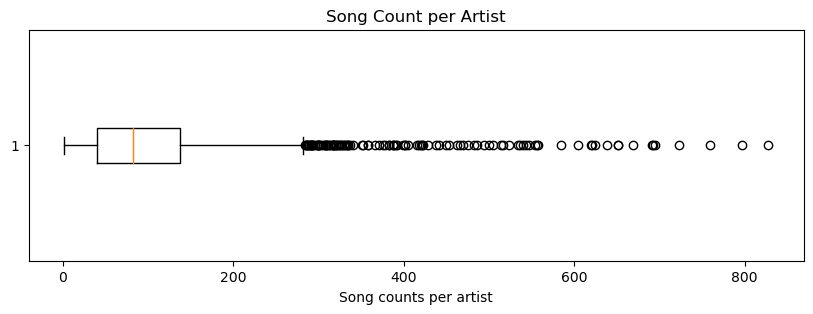

In [75]:
fig = plt.figure(figsize =(10, 3))
 
# Generate box plot
plt.boxplot(x, vert=False)
plt.xlabel("Song counts per artist")
plt.title("Song Count per Artist")
plt.show()
fig.savefig('images/artist_song_boxplot.png', dpi=fig.dpi)

In [51]:
np.median(x)

82.0

In [52]:
np.mean(x)

104.9943729903537

### Genres

In [53]:
genres_df = songs_pd_df[["ALink", "Genres"]]
genres_df.head()

,ALink,Genres
0,/ivete-sangalo/,Pop; Axé; Romântico
1,/ivete-sangalo/,Pop; Axé; Romântico
2,/ivete-sangalo/,Pop; Axé; Romântico
3,/ivete-sangalo/,Pop; Axé; Romântico
4,/ivete-sangalo/,Pop; Axé; Romântico


Check for duplicates and remove them. There should be many because of the merge with lyrics.

In [54]:
genres_df.ALink.value_counts()

/frank-sinatra/                    819
/elvis-presley/                    747
/dolly-parton/                     723
/matheus-hardke/                   707
/lil-wayne/                        689
                                  ... 
/paulo-sergio/                       1
/mr-catra/                           1
/buchecha/                           1
/pancadao-do-caldeirao-do-huck/      1
/restart/                            1
Name: ALink, Length: 2488, dtype: int64

Lets check one of the duplicate artists.

In [55]:
genres_df[genres_df["ALink"] == "/frank-sinatra/"].head(2)

,ALink,Genres
120727,/frank-sinatra/,Jazz; Clássico; Romântico
120728,/frank-sinatra/,Jazz; Clássico; Romântico


We can see, that most likely, all Genres are the same for each artist.

In [56]:
genres_df.sort_values("ALink").duplicated().value_counts()

True     188899
False      2488
dtype: int64

Therefore, we only have 2488 unique artist genre combinations. Let's remove the others

In [57]:
# Keep only unique values for ALink and Genres
genres_en_df = genres_df.drop_duplicates(subset=["ALink", "Genres"], keep="first", ignore_index=True).copy()
genres_en_df.head()

,ALink,Genres
0,/ivete-sangalo/,Pop; Axé; Romântico
1,/claudia-leitte/,Pop; Axé; Romântico
2,/daniela-mercury/,MPB; Axé
3,/olodum/,Axé
4,/carlinhos-brown/,Axé


In [59]:
# Split genres and add as list
genres_en_df.loc[:, "Genres"] = genres_en_df["Genres"].str.split('; ')
genres_en_df.head()

,ALink,Genres
0,/ivete-sangalo/,"[Pop, Axé, Romântico]"
1,/claudia-leitte/,"[Pop, Axé, Romântico]"
2,/daniela-mercury/,"[MPB, Axé]"
3,/olodum/,[Axé]
4,/carlinhos-brown/,[Axé]


In [60]:
# Explode genres list, so that each list entry gets it's own row
genres_en_exploded_df = genres_en_df.explode('Genres').copy()
genres_en_exploded_df.head()

,ALink,Genres
0,/ivete-sangalo/,Pop
0,/ivete-sangalo/,Axé
0,/ivete-sangalo/,Romântico
1,/claudia-leitte/,Pop
1,/claudia-leitte/,Axé


In [62]:
genres_en_exploded_df.Genres.unique()

array(['Pop', 'Axé', 'Romântico', 'MPB', 'Trilha Sonora', 'Dance',
       'Pop/Rock', 'R&B', 'Black Music', 'Hip Hop', 'Rap', 'Soul Music',
       'Electronica', 'Gospel/Religioso', 'Samba', 'Funk', 'Disco',
       'Reggae', 'Trip-Hop', 'World Music', 'Rockabilly', 'Rock', 'Blues',
       'Jazz', 'Classic Rock', 'Folk', 'Country', 'Psicodelia',
       'Soft Rock', 'Hard Rock', 'Rock Alternativo', 'Indie', 'Hardcore',
       'Instrumental', 'House', 'Piano Rock', 'Bossa Nova',
       'Velha Guarda', 'Clássico', 'Chillout', 'Trance', 'Gótico',
       'Electro Swing', 'Heavy Metal', 'Progressivo', 'COLETÂNEA',
       'Infantil', 'New Age', 'Punk Rock', 'Sertanejo', 'Funk Carioca',
       'Surf Music', 'Tecnopop', 'Pós-Punk', 'K-Pop/K-Rock',
       'Tropical House', 'Power-Pop', 'New Wave', nan, 'Emocore', 'Fado',
       'Grunge', 'Forró', 'J-Pop/J-Rock', 'Ska', 'Metal', 'Industrial',
       'Pop/Punk', 'Trap', 'Lo-fi', 'Reggaeton', 'Post-Rock',
       'Jovem Guarda', 'Kizomba', 'Pagode', 

In [63]:
unique_genres = genres_en_exploded_df["Genres"].nunique()
print(f"The dataset contains {unique_genres} unique genres.")

The dataset contains 75 unique genres.


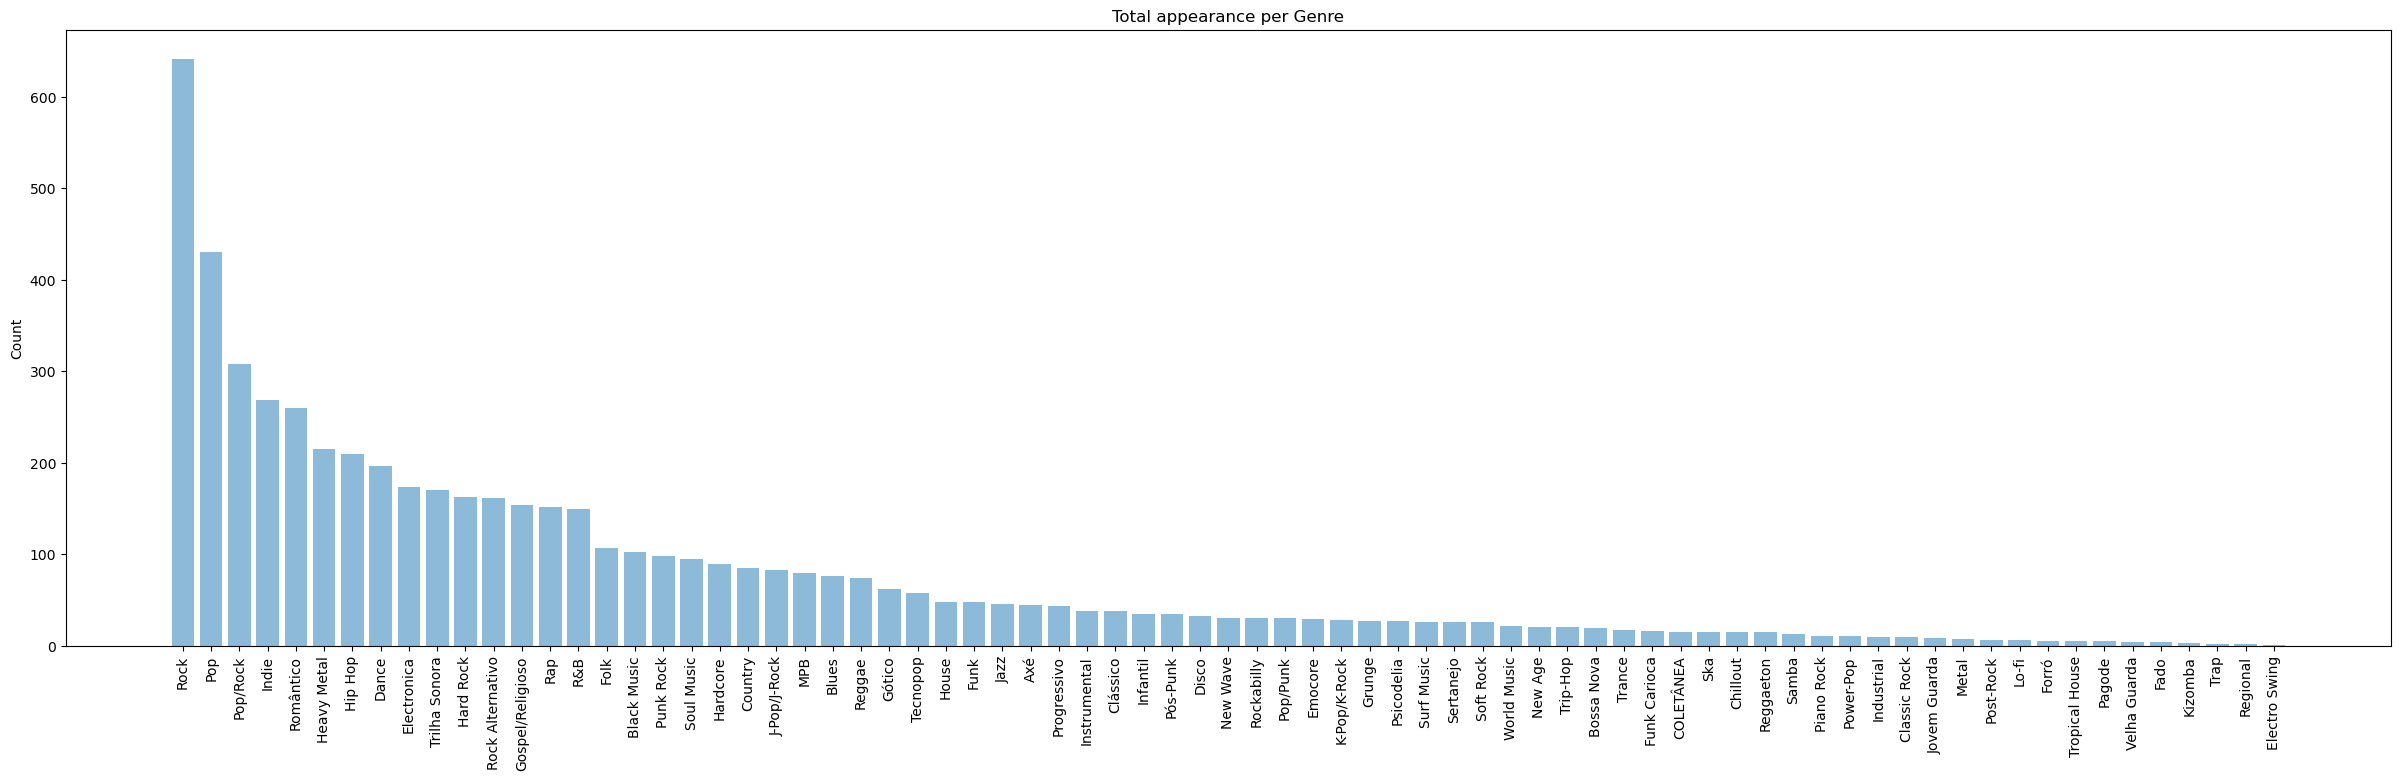

In [76]:
# Index of genre value count
x = genres_en_exploded_df["Genres"].value_counts().index.values
# Genre value count
y = genres_en_exploded_df["Genres"].value_counts().values

# Generate bar plot
fig = plt.figure(figsize=(30,8))
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Total appearance per Genre')
plt.show()
fig.savefig('images/genre_count.png', dpi=fig.dpi)

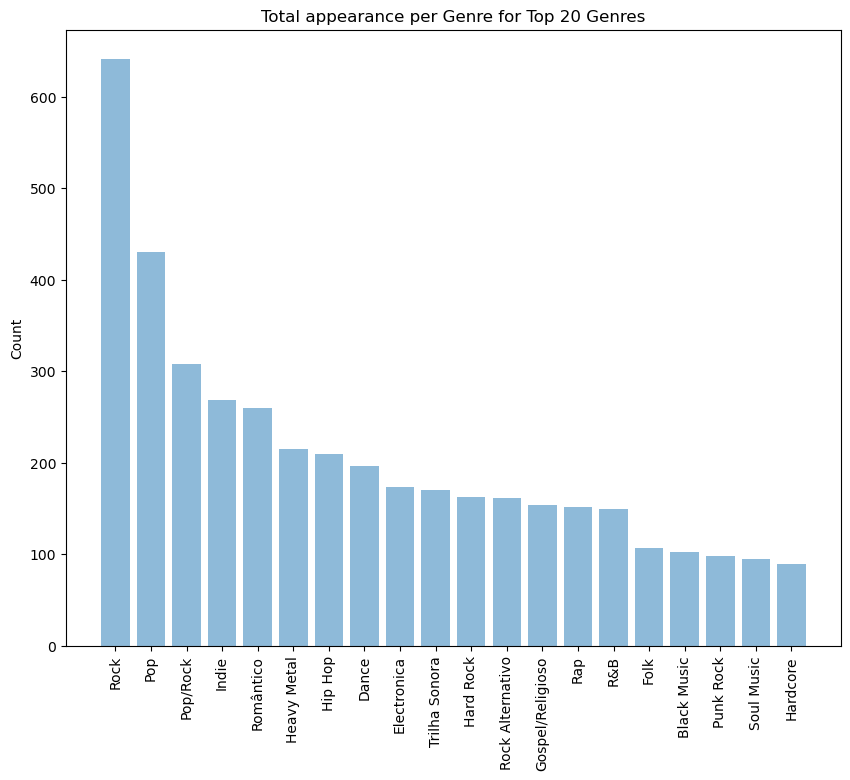

In [77]:
top_n = 20
# Index of top n genres value count
x = genres_en_exploded_df["Genres"].value_counts().index.values[0:top_n]
# Top n genres value count
y = genres_en_exploded_df["Genres"].value_counts().values[0:top_n]

# Generate bar plot
fig = plt.figure(figsize=(10,8))
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title(f'Total appearance per Genre for Top {top_n} Genres')
plt.show()
fig.savefig('images/genre_count_zoomed.png', dpi=fig.dpi)

Merge Genres with popularity

### Popularity

In [78]:
songs_pd_df[["ALink", "Popularity"]]

,ALink,Popularity
0,/ivete-sangalo/,4.4
1,/ivete-sangalo/,4.4
2,/ivete-sangalo/,4.4
3,/ivete-sangalo/,4.4
4,/ivete-sangalo/,4.4
...,...,...
191382,/clegg-johnny/,0.0
191383,/clegg-johnny/,0.0
191384,/clegg-johnny/,0.0
191385,/clegg-johnny/,0.0


In [79]:
# Merge Genres and popularity
genre_popularity_df = pd.merge(
    genres_en_exploded_df, 
    songs_pd_df[["ALink", "Popularity"]].drop_duplicates(subset=["ALink", "Popularity"], keep="first", ignore_index=True), 
    how="left",
    on="ALink"
)

genre_popularity_df.head(10)

,ALink,Genres,Popularity
0,/ivete-sangalo/,Pop,4.4
1,/ivete-sangalo/,Axé,4.4
2,/ivete-sangalo/,Romântico,4.4
3,/claudia-leitte/,Pop,1.5
4,/claudia-leitte/,Axé,1.5
5,/claudia-leitte/,Romântico,1.5
6,/daniela-mercury/,MPB,1.4
7,/daniela-mercury/,Axé,1.4
8,/olodum/,Axé,1.3
9,/carlinhos-brown/,Axé,1.4


In [80]:
# Groupby genres and calculate mean popularity of each genre
popularity_per_genre_df = genre_popularity_df.groupby("Genres").mean("Popularity").sort_values("Popularity", ascending=False)

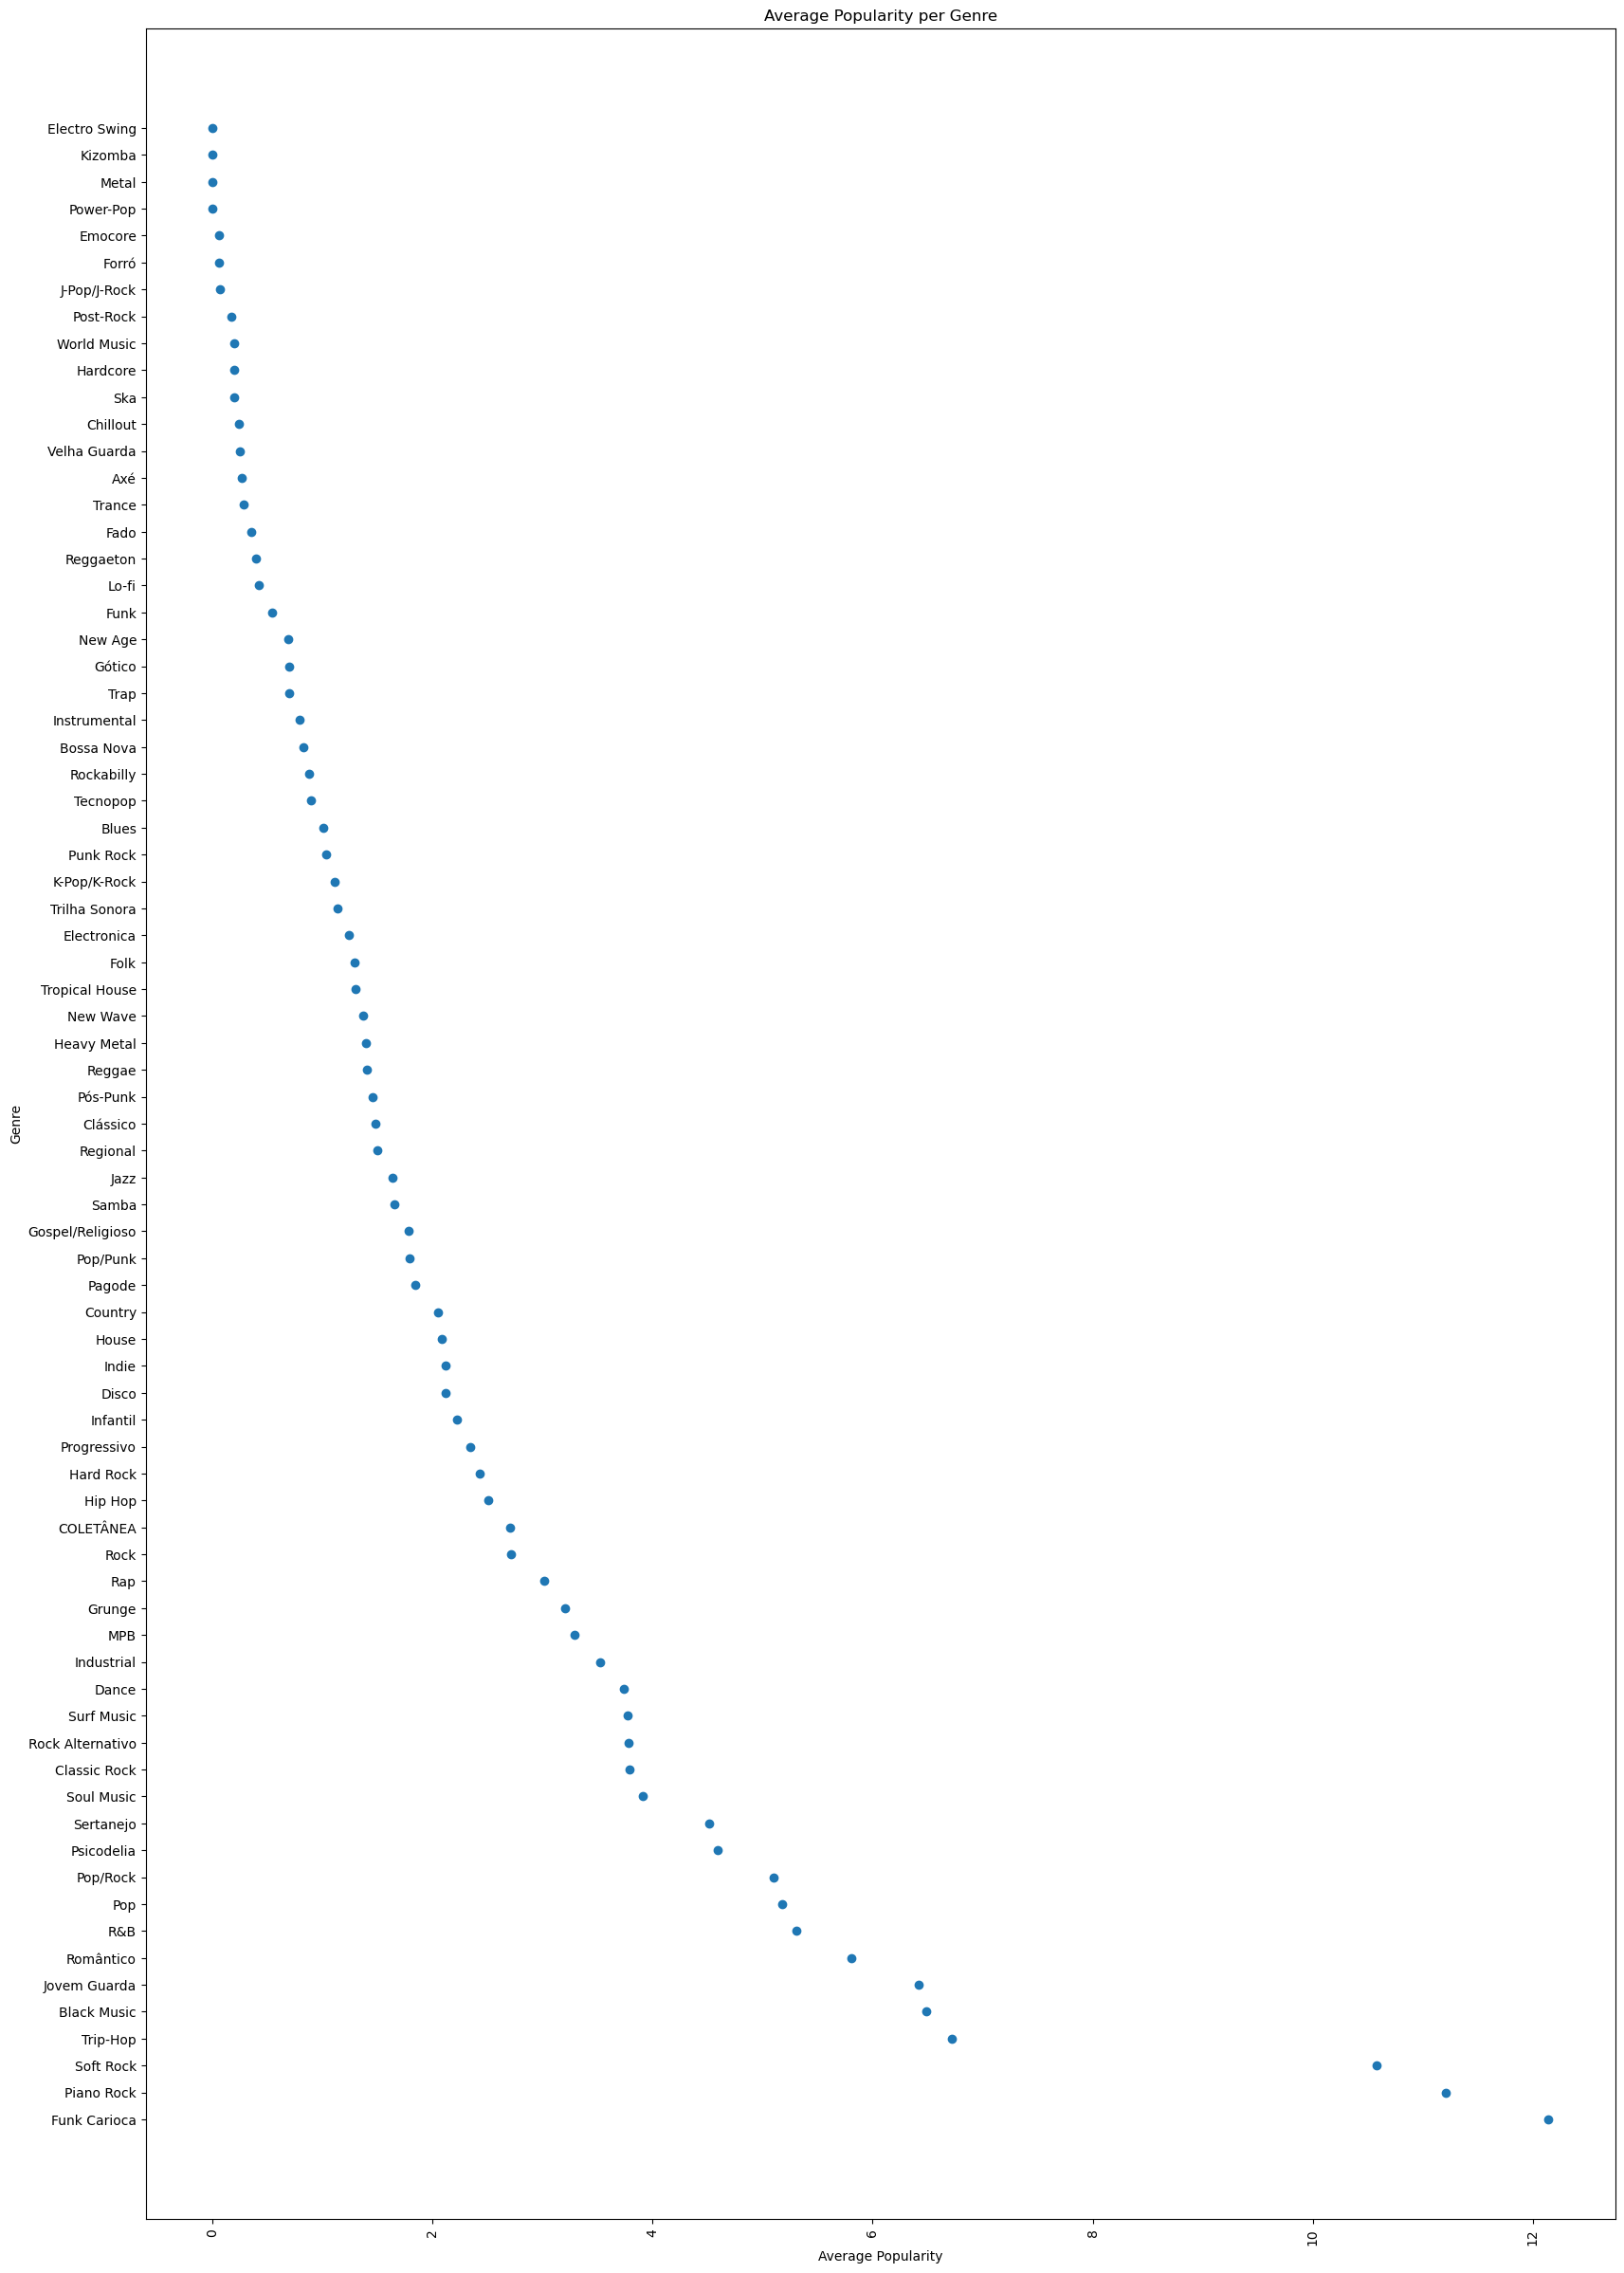

In [81]:
# Index of mean genre popularity
x = popularity_per_genre_df.index.values
# Mean genre popularity
y = popularity_per_genre_df.values

# Generate scatter plot
fig = plt.figure(figsize=(20,30))
plt.xticks(rotation=90)
plt.scatter(y, x)
plt.xlabel("Average Popularity")
plt.ylabel("Genre")
plt.title("Average Popularity per Genre")
plt.show()
fig.savefig('popularity_per_genre.png', dpi=fig.dpi)

In [82]:
# Groupby artist (ALink) and calculate mean popularity per artist
popularity_per_artist_df = genre_popularity_df.groupby("ALink").mean("Popularity").sort_values("Popularity", ascending=False)

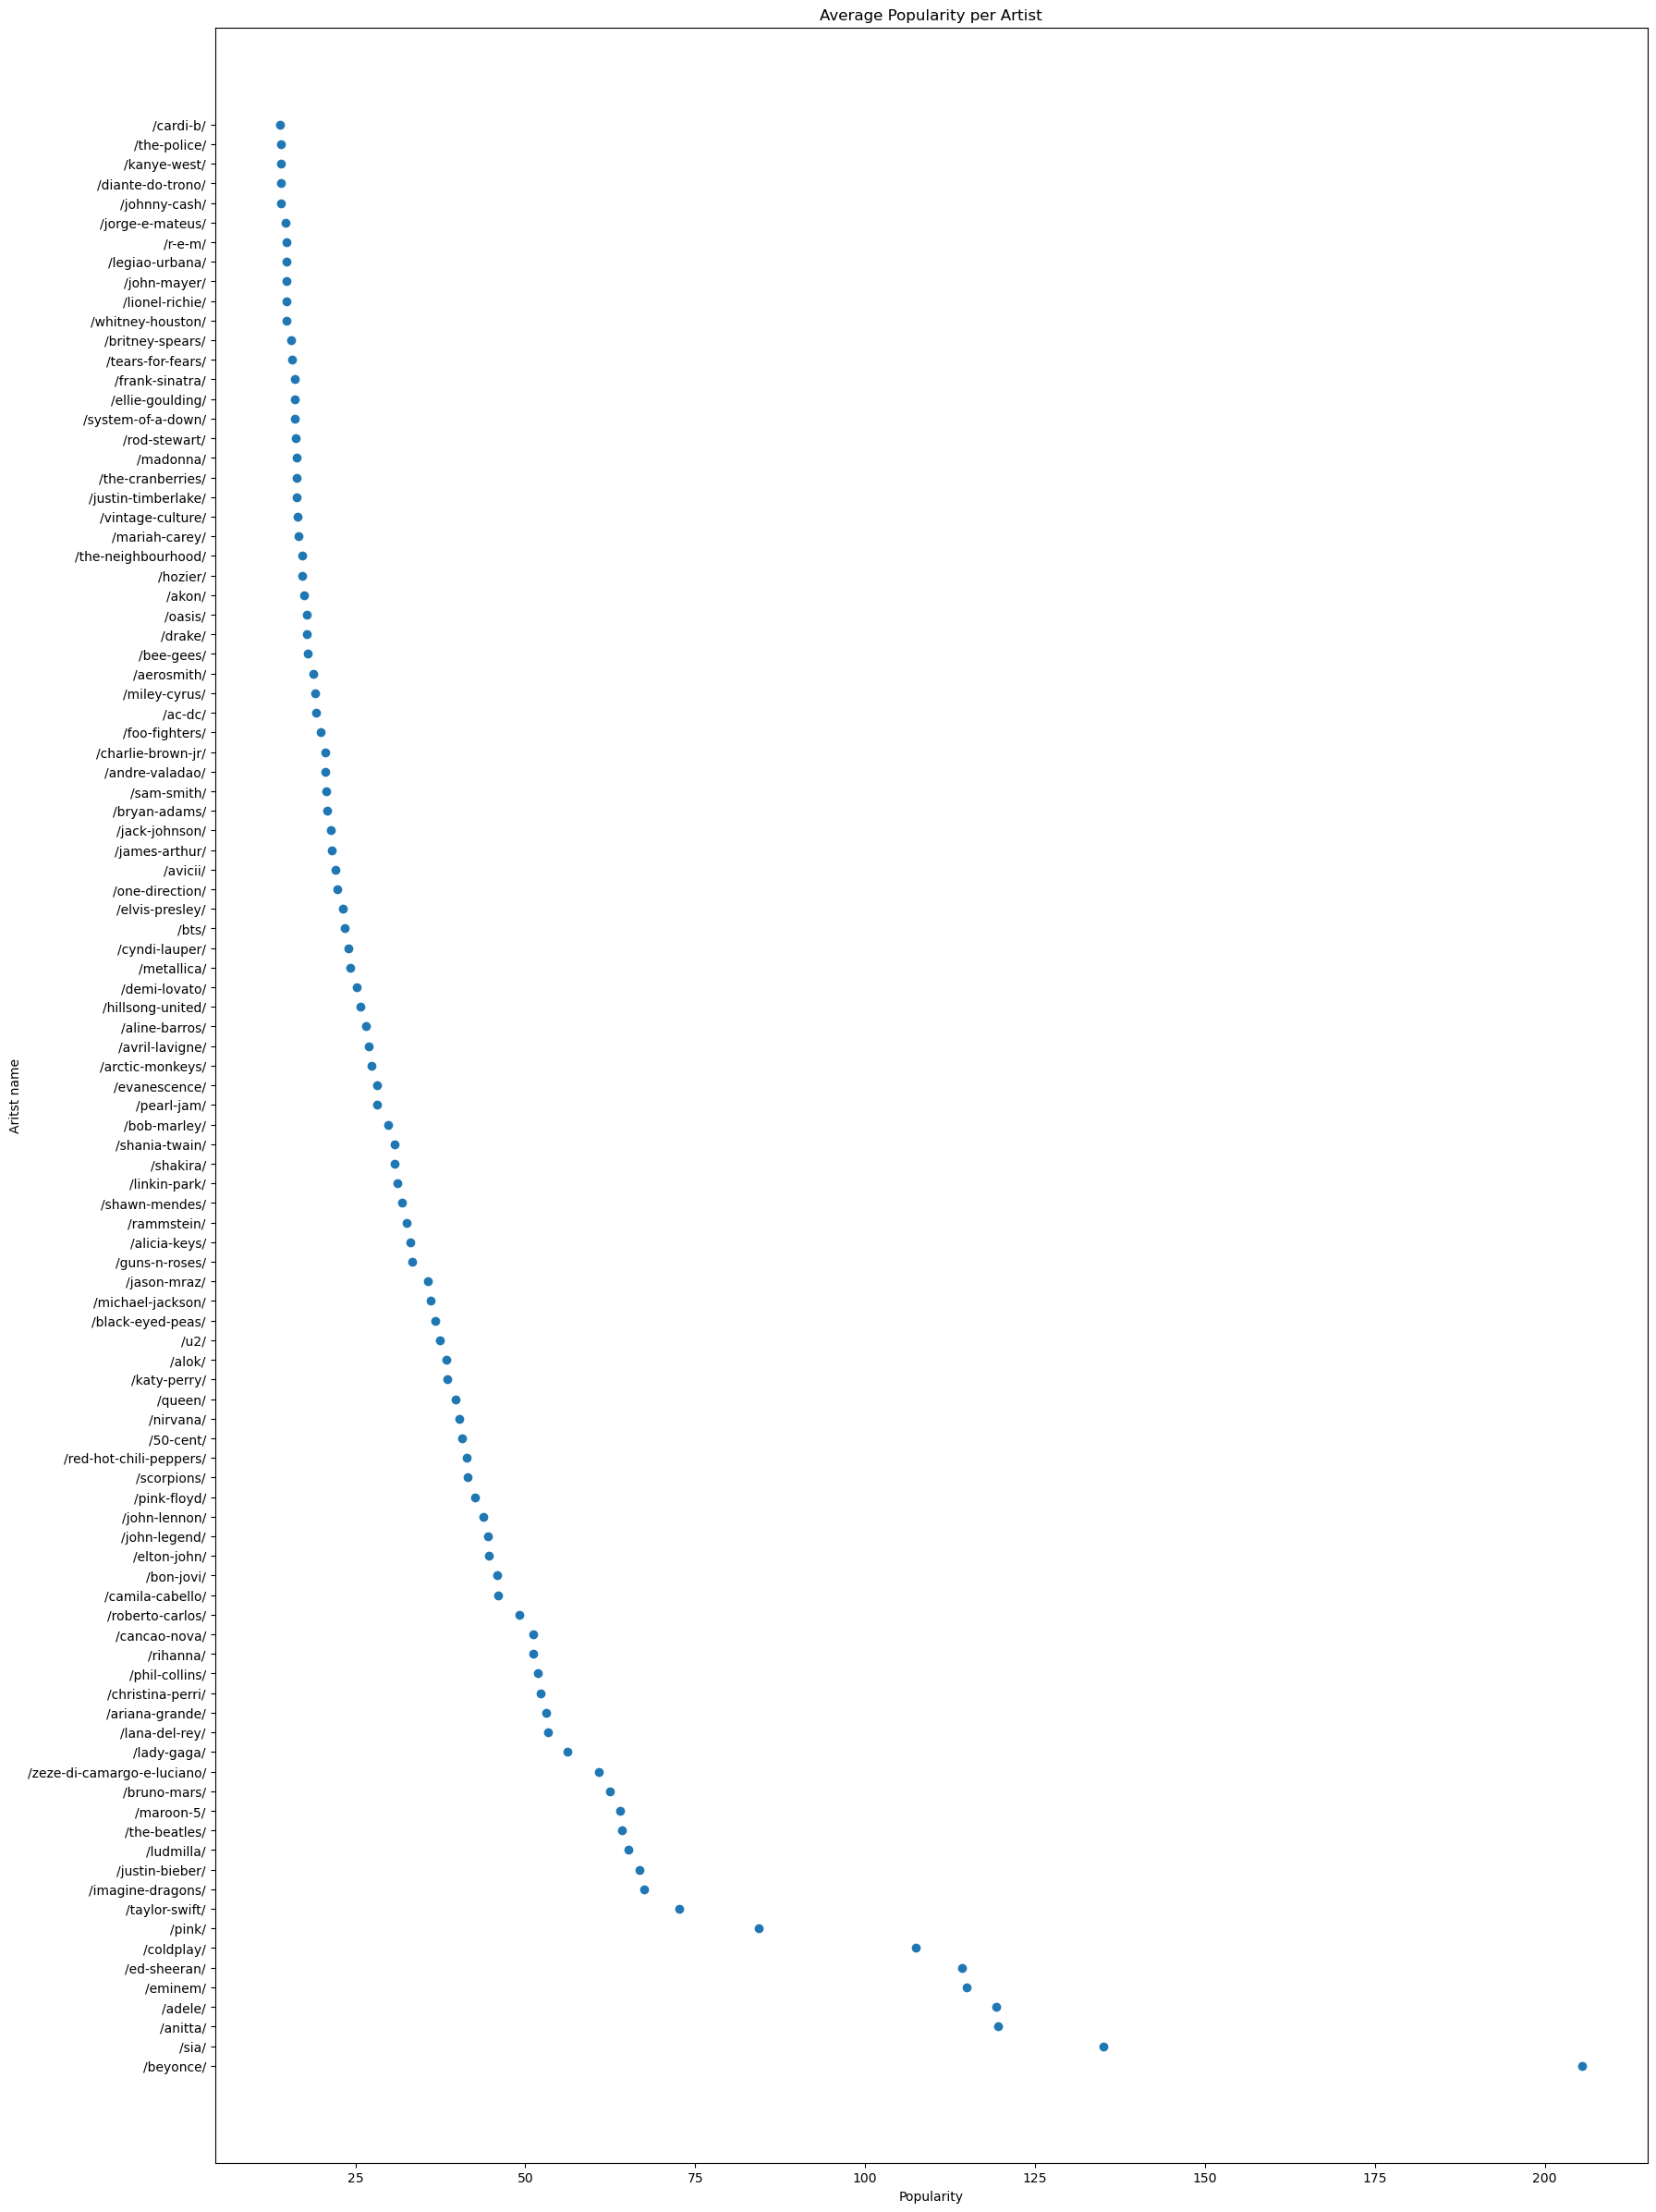

In [83]:
top_n = 100
# Index of top n artist popularity
x = popularity_per_artist_df.index.values[0:top_n]
# Top n artist popularity
y = popularity_per_artist_df.values[0:top_n]

# Generate scatter plot
fig = plt.figure(figsize=(20,30))
plt.xticks(rotation=0)
plt.scatter(y, x)
plt.ylabel("Aritst name")
plt.xlabel("Popularity")
plt.title("Average Popularity per Artist")
plt.show()
fig.savefig('popularity_per_artist.png', dpi=fig.dpi)